Пусть события   
$A$ - вероятность того, что случайный человек из популяции - убийца,  
$\overline{A}$ - вероятность того, что случайный человек из популяции - не убийца,  
$a$ - вероятность того, что подозреваемый - убийца,   
$\overline{a}$ - вероятность того, что подозреваемый - не убийца,  
$B$ - вероятность того, что человек из популяции имеет редкую группу крови,  
$\overline{B}$ - любая другая группа крови

Также известно, что $P(B|A) = 1$ и $P(B) = 0.01, P(\overline{B}) = 0.99 $

### Задача 1

Пусть изначальная вероятность того, что подозреваемый - убийца $P(a) = k$,  
а с учетом того, что кровь убийцы и продозреваемого совпадает, эта вероятность выросла на $m$, т.е. $P(a|B) = k + m$  
Прокурор утверждает:  
$1. P(B|\overline{a}) = 0.01$  
$2. P(B|\overline{a}) = 0.01 \Rightarrow P(a|B) = 0.99$  
<br>

Вычислим $P(B|\overline{a})$:  
$P(a|B) = \frac{P(B|a)P(a)}{P(B)} \Rightarrow k + m = \frac{k~P(B|a)}{0.01} \Rightarrow P(B|a) = \frac{k +m}{100~k}~~~(1)$  
$P(a|B) = \frac{P(B|a)P(a)}{P(B)} = \frac{P(B|a)P(a)}{P(B|a)P(a) + P(B|\overline{a})P(\overline{a})}$  
$k + m = \frac{P(B|a)k}{P(B|a)k + P(B|\overline{a})(1 - k)}$  
$(k + m)(P(B|a)k + P(B|\overline{a})(1 - k)) = P(B|a)k$  
$(k + m)P(B|\overline{a})(1 - k) = P(B|a)k(1 - k - m)$  
$P(B|\overline{a}) = \frac{P(B|a)k(1 - k - m)}{(k + m)(1 - k)}$  
$P(B|\overline{a}) = \frac{\frac{k +m}{100~k}k(1 - k - m)}{(k + m)(1 - k)} = \frac{1 - k - m}{100~(1 - k)}~~~~ (2)$  
<br>
Если верить прокурору, что $P(B|\overline{a}) = 0.01$, тогда из (2) следует, что $m = 0$, т.е. для прокурора факт того, что у подсудимого - редкая группа крови, не имеет никакого значения, т.е. $P(a|B) = P(a) = k$.  
<br>
Основная ошибка - импликация $P(B|\overline{a}) = 0.01 \Rightarrow P(a|B) = 0.99$.  
Непонятно, как был сделан такой вывод.

Прокурор должен был показать, что $P(a|B) > P(a)$  

Я могу только предположить схему рассуждений, как это сделать:

Пусть популяция имеет размер $N$, число людей с редкой группой крови в ней $M$,  
тогда если подозревать всех одинаково, то  
$P(A) = \frac{1}{N}$  
$P(B) = \frac{M}{N}$  
$P(A|B)P(B) = P(B|A)P(A)$   
$P(A|B)\frac{M}{N} = P(B|A)\frac{1}{N}$  
$P(A|B)\frac{M}{N} = 1~\frac{1}{N}$  
$P(A|B) = \frac{1}{M}~~~(3)$  
$P(A|B) > P(A)$  
Однако как правильно перейти от $P(A|B) > P(A)$ к $P(a|B) > P(a)$ я не знаю. 

### Задача 2

Адвокат утверждает, что $P(a|B) = \frac{1}{M}$  
Это - совпадает с результатом (3) из предыдущей задачи, т.е. адвокат выбрал априорное равномерное распределение $P(a) = P(A) = \frac{1}{N}$, что означает, что нет других доказательств вины подозреваемого, кроме его группы крови, что скорее всего неправда.

### Задача 3

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Нужна какая-то функция ошибок:  
1. Важно, чтобы система здравоохранения не была перегружена, поэтому сумма всех положительных кейсов - слагаемое в функции
2. Важно не маркировать больных, поскольку больной может заразить здорового, то следует дать слагаемому fn_share мультипликативный множитель, который должен обозначать число людей, которое будет заражено в будущем из-за этого человека.  
Контагиозность = 3, при низких значениях fn_share должно хватит 3 поколений больных 1 + 3 + 9 + 27 = 40



In [0]:
global_prior_prob=0.01

def calc_loss_function(tp_probability, tn_probability, fn_loss_multiplier=40):
  tp_share = global_prior_prob * tp_probability
  fn_share = global_prior_prob * (1 - tp_probability)
  tn_share = (1 - global_prior_prob) * tn_probability
  fp_share = (1 - global_prior_prob) * (1 - tn_probability)
  return tp_share + fp_share + fn_loss_multiplier * fn_share

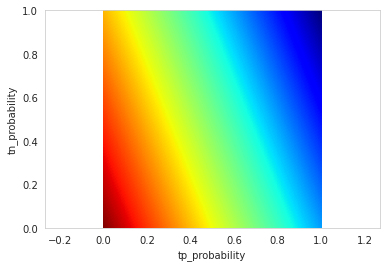

In [0]:
def calc_loss_function_vectorized(point_num = 500):
  result = np.ndarray(shape=(point_num, point_num))
  probs = np.arange(0, 1.001, 1 / point_num)
  for i in range(point_num):
    for j in range(point_num):
      result[i][j] = calc_loss_function(tp_probability = probs[i], tn_probability = probs[j])
  return result

def myplot_heatmap(Z, point_num = 500):
    # Make the plot
    plt.axis('equal')
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    X = np.linspace(0, 1, point_num)
    Y = np.linspace(0, 1, point_num)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.xlabel("tp_probability")
    plt.ylabel("tn_probability")
    plt.show()

myplot_heatmap(calc_loss_function_vectorized())

Из того, что градиент функции ошибок вдоль оси x (вероятность ложноположительных ошибок) изменяется быстрее,  
то выгоднее улучшать (снижать) false positives